![MorningStar](files/images/TitleImage.png)

<a href="#Introduction">Introduction</a><br>
<a href="#Background">Background</a><br>
<a href="#Environment Set up">Environment Set Up</a><br>
<a href="#Accessing the Data">Accessing the Data</a><br>
<a href="#Data Analysis">Data Analysis</a><br>

<h3><a name="Introduction">Introduction</a></h3><br><br>
This iPython notebook provides value investor-based analysis of [Deere & Company](http://www.deere.com/en_US/corporate/our_company/about_us/about_us.page?/), a company Bershire Hathaway acquired a 5 percent stake in 2014. Outside of demonstrating one approach to breaking down a company's financials to determine its intrinsic value, this work also demonstrates the utility of modern data analysis tools like [Python](https://www.python.org/), [iPython](http://ipython.org/), Anaconda, and [scikit-learn](http://scikit-learn.org/stable/) (i.e. machine learning tool) to create repeatable analytic workflows.  At the end, we will come away with a recommendation of whether to invest in the company or not. If you download this notebook, you can recreate this analysis for any company by using your ticker symbol of choice in the "good-morning" module below.  

![Disclaimer](http://www.ravenht.org.uk/data/images/Data_Protection/disclaimer.jpg)

Now, before you read any further, know this:
* *I am not a certified financial analyst*
* *I do not have a degree or certification from one of the world's [top business schools](http://www.topmba.com/mba-rankings/specialization/finance)...and I'm not working on one either; my degree is in Physics*
* *I do not receive any payment or compensation for financial advice or services*
* *I am not liable for any decisions that result from this analysis*
* *I did not own any shares in [DE](http://www.morningstar.com/stocks/XNYS/DE/quote.html) at the time of writing.*

Now,with the disclaimer out of the way, let's cover some of my realities.  

What I do have is a strong desire to gradually achieve financial independence by acquiring assets at a discount [(if you don't know what an asset is, click here to learn)](http://www.investinganswers.com/financial-dictionary/financial-statement-analysis/asset-2278).  Add to that my insatiable curiosity to learn new and smarter ways of using data to improve my situation (i.e. learn more, grow net worth, or automate something).  In this case, the goal is to purchase assets -- after careful analysis -- at every possible opportunity.  Thus, securities hold a significant portion of my net worth.  More importantly, the analysis I share today is a part of what I do to grow my resources for the future. What's the point? There's no agenda here, outside of sharing a repeatable analytic workflow, helping other value investors along the way, and showing how data analytics impacts nearly every career field. Plain and simple, this exercise will demonstrate how information availability and open source technologies expand the world of possibilities to the common man.  An added benefit is, we'll learn to break down a company like Warren Buffett. 

![Priorities](https://www.bayzat.com/static/images/media/13%2003%2016%20-%20Smart%20tips%20for%20personal%20finance%20-%20v2.jpg)


<h3><a name="Background">Background</a></h3><br><br>
Before we delve into the analysis, it's only proper that we address or at least provide resources for some of the terms thrown out so far. Let's start with value investing.  Value investing is the [strategy of selecting stocks that sell for less than their intrinsic values](http://www.investopedia.com/terms/v/valueinvesting.asp).  In layman's terms, that translates to "buying something on sale".  At the core of value investing is the need to do some financial analysis.  It only make sense; in order to understand that something is selling at a discount you must first understand what it is worth.  So, while value investing involves rigourous analysis of facts and figures, it's still more of an art than a science. 

The greatest value investing artist of this age is [Warren Buffett](https://en.wikipedia.org/wiki/Warren_Buffett).  In truth, the greatest "artist" is actually a tandem of artists, featuring Warren Buffett and [Charlie Munger](https://en.wikipedia.org/wiki/Charlie_Munger), but Mr. Buffett is easily the more visible and vocal of the two.  Warren Buffett has left a wealth of knowledge on value investing in letters to [Berkshire Hathaway shareholders](http://www.berkshirehathaway.com/letters/letters.html), [his autobiography](https://en.wikipedia.org/wiki/The_Snowball:_Warren_Buffett_and_the_Business_of_Life), and dozens of [magazine articles and speeches](http://www.tilsonfunds.com/motley_berkshire_warren_speeches.php) over several decades. In all of that knowledge, and specifically the [1976](https://aboveaverageodds.files.wordpress.com/2009/12/buffett_bh76.pdf) and [1978](http://www.berkshirehathaway.com/letters/1978.html) letters to shareholders , Mr. Buffett provided four rules that govern his strategy for investing, which we will use in our analysis of a company in the notebook.  Buffett acquires partial ownership of a business when it: 

1. **Is a business that he understands.**  *Levine-Weinberg from TheFool.com put it well in his [July 2014 article](http://www.fool.com/investing/general/2014/07/06/warren-buffetts-4-rules-for-stock-market-success.aspx), "There are surely tech start-ups you could invest in today that will crush the market in the next 10 years. But if you're not a technology expert, how will you find them?"  <span style="color:red; font-family:Georgia; font-size:initial;">In this example, I picked Pfizer.  They discover, develop, and manufacture healthcare products.  Pretty easy to understand.* </span>
<br>
<br>

2. ** Has favorable longterm prospects.**  *A good translation is in a [June 2015 BusinessInsider.com article](http://www.businessinsider.com/warren-buffett-investing-rules-2015-6) where Kathleen Elkins said one must consider "whether or not the company will be able to sell their product in 30 years."  <span style="color:red; font-family:Georgia; font-size:initial;">Here is a simple example: Apple is a great company, but will people be using iPhones in 2045 (pretty much an unknown)?  Will people still be drinking Coca Cola in 2045 (that's a near certainty)?*</span>
<br>
<br>

3.  **Operated by honest and competent people** *This rule is simple enough, but hard to measure.  An article at [InvestorsPodcast.com](http://www.theinvestorspodcast.com/episodes/3-warren-buffett-rules-intrinsic-value.html#sthash.ezTVFQpA.dpuf) gives us one measurable, borrowing from BuffettsBooks.com, when it says "look for a company that has twice as much equity as debt...Having only a little debt gives the business a lot of flexibility and agility to make the right decisions for shareholders."  <span style="color:red; font-family:Georgia; font-size:initial;">We will use the debt-to-equity and current ratios to evaluate leadership impact on debt.*</span>
<br>
<br>
4. **Available at a very attractive price.** *This is the simplest rule, but the one that requires the most detective work and data analysis. This centers on calculating the intrinsic value of a company, or the true worth of a company (not the ticker price).  <span style="color:red; font-family:Georgia; font-size:initial;">Buffett talked about [the "art" of calculating intrincic value in an annual report](http://www.valuewalk.com/2014/03/warren-buffett-intrinsic-value-two-problems/).  For now, I use the [BuffetsBooks.com calculator](http://buffettsbooks.com/howtoinvestinstocks/course2/stocks/intrinsic-value-calculator.html#sthash.I02x9s7w.dpbs).*</span>
<br>
<br>
![BerkshireHathawayLetters](http://ecx.images-amazon.com/images/I/51duPVN7EnL._SX391_BO1,204,203,200_.jpg)

Simple rules right?  A company that passes these four rules gets into "Buffet-worthy" territory.  This is great territory for a company because when Buffett buys, [millions will follow](http://www.businessspectator.com.au/article/2015/6/18/asx/investors-should-brace-buffett-effect). Following is easy so it seems like all investors should be knocking it out of the park.  Not the case! As you will see, it can be hard to find companies that meet all four requirements.  More of your time will be spent analyzing and deciding on companies not worth buying.  Buffett covered this in his 1976 shareholder letter when he said, [*"It is difficult to find investments meeting such a test, and that is one reason for our concentration of holdings.  We simply can't find one hundred different securities that conform to our investment requirements."*](https://aboveaverageodds.files.wordpress.com/2009/12/buffett_bh76.pdf)

One last bit of value investor knowledge before we move to the data access and analysis.  Purchasing a [share or stock is becoming a part owner of a business](http://www.investopedia.com/terms/s/stock.asp). It is more than buying the price tied to a ticker symbol.  Holding that concept in your mind stresses the importance of analyzing the company in the same way you would analyze a person who asks you to borrow some money.  You lend based on their ability to pay you back.  In this case, you invest based in the company's ability to reliably return value over an extended period of time.   

<h3><a name="#Environment Set up">Environment Set Up</h3></a><br>

<span style="color:red; font-family:Georgia; font-size:initial;">Full disclosure: I am running OSX El Capitan (10.11.1) on a 2012 Macbook.  Linux or Windows users will have to adjust accordingly. My environment below uses Python 3.5....remember that!!!! </span> 

The first thing we will do is set up an environment that is exactly like the environment I used to create this notebook.  Lucky for you, I am using [Anaconda](https://www.continuum.io/downloads) which is an easy-to-install, free package manager, environment manager, Python distribution, and collection of over 150 open source packages with free community support. Why are you lucky?  Because it takes a few lines of code to recreate my development environment with all its dependencies. The steps are:
1. [Install Anaconda first](http://docs.continuum.io/anaconda/install); make sure it is properly installed by typing "conda" in your command prompt or terminal
2. Then, [get my yaml file](https://github.com/linwoodc3/LC3-Creations/tree/master/notebooks/securityanalysis) from the project repository. If you don't use Anaconda, use the list at this link to install all the modules I'm using
3. Follow the ["Use Environment from file"](http://conda.pydata.org/docs/using/envs.html#export-the-environment-file) instructions on Anaconda's website. 
4. Clone https://github.com/petercerno/good-morning (make sure this is acessible to your sys.path)

There's one more dependency we need to cover; we need to make sure our notebook can import the good-morning repository we just cloned; looking inside the project folder, we see there's no "setup.py" file (*I may create one and do the pull request for the github project*).  That means we need to maunally add this file to a path where Python can import it.  I'll put it in the environment path we created. First, I need to know where that is:  

```python
>which conda
/Users/linwood/anaconda/envs/py35/bin/conda

```

Alternatively, this may work for you

```python
>import sys
>sys.path.append('/...path to.../anaconda/envs/py35/lib/python3.5') # remove "...path to...", and replace with path to  your envs folder
```


Your output may be slightly different from mine based on how you installed anaconda.  Now, copy the "good_morning.py" and "good_download.py" files from the repository we cloned earlier, and paste them in the "py35" directory somewhere.  

# Let's Hit the Data Science Pipeline
![Data Access](files/images/data_access.png)

To do this analysis, we need 10 years of fundamental financial data.  To understand why, Buffettsbooks.com put together a great series of videos that explains Buffett's four rules and what type of data we need to analyze the company.  Look at [Course 2, videos 17-21](https://www.youtube.com/playlist?list=PLD3EB06EC4A19BFB8).

We have three ways to get the data:
<br>
1.  **Go to the data provider's portal; copy and paste the data into dataframe**
2.  **Go to the data provider's portal; export a CSV, load into dataframe**
3.  **Use an existing pythonic interface with the data to ingest it directly into my modeling environment** 

I try all three and give advantages and disadvantages of each.

# Getting data directly from the data provider the old way

The manual data pull is not glamourous at all.  The goal is get ten years worth of financial data from MorningStar.  Why [MorningStar](http://www.morningstar.com/)?  Well, based on the great video series from [BuffetsBooks.com](http://buffettsbooks.com/start-here.html), this is one of the only websites that provide 10 years of historical financials for FREE. To get to the data, enter the company's [ticker symbol](https://en.wikipedia.org/wiki/Ticker_symbol) in the "Quote" box on the MorningStar homepage.  We are looking at Pfizer, so enter "PFE". Select the "Key Ratios" tab.  We have our data!  There are two options now.  We can use the "Export" button to download a CSV or we can cut and paste the figures we want.  Both options work for our tool of choice.

The goal of this notebook is to use open source tools for analysis, so instead of Excel, I opted to use Python pandas.  [*pandas* is an open source, BSD-licensed library](http://pandas.pydata.org/) providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

So let's import our tool:

In [3]:
import pandas as pd

We will cover the data import options going from the most time consuming to the least.  In this case, we'll talk about the old **"cut and paste"** method first. 

To start, we need some data copied.  If you followed directions above, the "Key Ratios" data should be in our browser.  To copy me directly, we are going to start with the [current ratio](http://www.investopedia.com/terms/c/currentratio.asp).  In the [middle-bottom of the "Key Ratios" tab, click the "Financial Health" tab](http://financials.morningstar.com/ratios/r.html?t=PFE&region=USA&culture=en_US).  When the screen refreshes, you should see a section titled "Liquidity/Financial Health" at the bottom; copy the "Current ratio" line of data.  If you copy it, the pasted output will look like this:

This is the pasted output from MorningStar.com:
```python
1.47	2.20	2.15	1.59	1.66	2.11	2.06	2.15	2.41	2.67	1.62
```


That gives us one current ratio for each year back to 2005.  Next, we create a [python dictionary](https://docs.python.org/2/tutorial/datastructures.html#dictionaries) with our data.  That involves creating key,value pairs.  The year will be the *"key"* and the current ratio for that year will be the *"value"*. In our data, the first key,value pair is: 2005:1.47.  Let's do that and see the output: 

In [4]:
# Use the year as the key and the current ratio for that year as the value in the dictionary

current_ratio={2005:1.47, 2006:2.20, 2007:2.15, 2008:1.59, 2009:1.66, 2010:2.11, 2011:2.06, 2012:2.15, 2013:2.41, 2014:2.67 ,2015:1.62}
current_ratio; # remove the semicolon to see the output

Typing out the dictionary syntax takes a few minutes.  A dictionary easily converts to a [pandas dataframe](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe), which is similar to an excel spreadsheet. Our goal is to get all the data into a single dataframe. Let's create our dataframe, and name it df. 

In [5]:

# Use the values as the data in the dataframe but use the keys of the current_ratio dictionary as the dataframe's index

df = pd.DataFrame([value for key,value in current_ratio.items()],columns=['current_ratio'], index = current_ratio.keys())
df; # remove the semicolon to see the output

In [6]:
import pandas

We only have the current ratio figures.  Let's add more fundamental financial data! 

This time, we are going to create [python lists](https://docs.python.org/2/tutorial/introduction.html#lists) from the pasted data.  We then convert those lists to arrays using [numpy](http://docs.scipy.org/doc/numpy/user/whatisnumpy.html);  a [numpy array](http://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html) can be appended to a pandas dataframe. At the end of this code block, we should have a dataframe with all of our historical data.  Let's import what we need and write the code.

In [7]:
import numpy as np # we give numpy a shorthand name on import; coders are lazy


# We paste the data, enclose it in brackets, and add commas between values to create the list
# then use 'np.asarray' (numpy) to convert our list to an array
# numpy is a fundamental package for scientific computing in Python.
# the df['name'] code appends the result to the dataframe we created above and gives the column's title
# Then, we look at our new dataframe (df)

df['debt_equity']=np.asarray([0.10,	0.08,	0.11,	0.14,	0.48,	0.44,	0.43,	0.38,	0.40,	0.44,	0.44])
df['dividend']=np.asarray([0.76,	0.96,	1.16,	1.28,	0.80,	0.72,	0.80,	0.88,	0.96,	1.04,	1.10])
df['EPS']=np.asarray([1.09,	2.66,	1.17,	1.20,	1.23,	1.02,	1.27,	1.94,	3.19,	1.42,	1.33])
df['BVperShare']=np.asarray([9.05,	9.77,	9.60,	8.52,	11.15,	10.95,	11.88,	11.16,	12.18,	12.39,	10.82])
df['Debt']= np.asarray([5.40,	4.83,	6.35,	7.16,	20.28,	19.70,	18.58,	16.70,	17.70,	18.63,	17.02])
df; # remove semicolon to see output

**This is the old way of getting data and it's going out of style fast**.  It works, but let's highlight some quick advantages and disadvantages:
1. **Advantages**
  * We get the exact data we want
  * It's up to date information
  * We don't worry about fake data or viruses; the data is coming from the provider's portal
  * We get a lot of practice on constructing and relating python data structures
  
2. **Disadvantages**
  * Time consuming
  * Chance of human error extremely high; adding commas and deleting extra spaces is always a problem
  * The data is not loaded dynamically, when the dataframe is created

# Getting data directly from the data provider the 'KIND OF' old way

Next, we try the "kind of old way" of getting the data we need.  We get a little fancier by eliminating the *cut and paste* workflow and instead, use the option to export a CSV.  pandas can ingest CSV files, so our tool will be happy!  Let's give it a go.  

Return to the MorningStar page in your browser with Pfizer's key ratios displayed.  Look for the "Export" option, click it and download the csv.  

![Export](files/images/MorningStarExport.png)

I named my download "pfe_key_ratios.csv".  A copy of the data as of 17 November 2015 is in the "data" folder of the github repository for this notebook.  Now, let's load it!

In [8]:
#df2 = pd.read_csv('data/pfe_key_ratios.csv')

'''
The first line will throw an error, becuase of some problems with how the file is structured. The
exact error is: "CParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 12"

Remember "Don't reinvent the wheel". A good practice is to copy the exact error you get, paste 
it into Google, and see how others solved the problem.  In my case, this url provided the workaround:
http://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data
'''
df2 = pd.read_csv('data/pfe_key_ratios.csv',error_bad_lines=False);
df2; # remove the semicolon to see the output

b'Skipping line 3: expected 1 fields, saw 12\nSkipping line 4: expected 1 fields, saw 12\nSkipping line 5: expected 1 fields, saw 12\nSkipping line 6: expected 1 fields, saw 12\nSkipping line 7: expected 1 fields, saw 12\nSkipping line 8: expected 1 fields, saw 12\nSkipping line 9: expected 1 fields, saw 12\nSkipping line 10: expected 1 fields, saw 12\nSkipping line 11: expected 1 fields, saw 12\nSkipping line 12: expected 1 fields, saw 12\nSkipping line 13: expected 1 fields, saw 12\nSkipping line 14: expected 1 fields, saw 12\nSkipping line 15: expected 1 fields, saw 12\nSkipping line 16: expected 1 fields, saw 12\nSkipping line 17: expected 1 fields, saw 12\nSkipping line 18: expected 1 fields, saw 12\nSkipping line 21: expected 1 fields, saw 12\nSkipping line 22: expected 1 fields, saw 12\nSkipping line 23: expected 1 fields, saw 12\nSkipping line 24: expected 1 fields, saw 12\nSkipping line 25: expected 1 fields, saw 12\nSkipping line 26: expected 1 fields, saw 12\nSkipping line 2

Whoa!!!!  That red means Python is giving us a warning, and if you look closely, you see a lot of skpped data. Everything actualy. MorningStar's export CSV is not something pandas likes.  Close inspection of the spreadsheet highlights the problem.  

![LibreOffice](files/images/LibreOffice.png)

The export is nice and structured, but the organization of the data is not something pandas appreciates. Could we write something to read this, probably. But that would take some time. To be fair, I now have everything I need to continue this work in LibreOffice Calc (free and more than capable alternative to Microsoft Excel). Our goal is to do this in Python.   

**This is the "kind of" old way of getting data and is likely the most used method today**.  It's a super quick option to get data for analysis in spreadsheets, but let's highlight some advantages and disadvantages:
1. **Advantages**
  * Again, we get the exact data we want
  * Quick!  We got everything in one spreadhsheet very quickly
  * We don't worry about fake data or viruses; the data is coming from the provider's portal
  * We get a lot of practice on constructing and relating python data structures
  
2. **Disadvantages**
  * The format isn't ready for pandas ingest without some tedious wrangling
  * We're back to manual analysis; we'll be cutting and pasting data to different sheets 
  * The data is only as current as the download you get
  * Process will be stored locally; not available to others

# Getting data from the data provider the new way

Last, we'll look at a pythonic way to get this data.  Just as Warren Buffett has his rules to investing, there's a rule that governs the lives of most programmers, coders, data scientists, etc.  [That rule is, "Don't reinvent the wheel!!"](http://blog.codinghorror.com/dont-reinvent-the-wheel-unless-you-plan-on-learning-more-about-wheels/)  

Chances are, someone, somewhere out there has faced the same problem I'm facing right now.  There are even greater chances that this someone solved the problem, or is farther along at solving the problem than I am.  So, what's my problem?  ** I want to access 10 years of fundamental financial data from MorningStar.com without leaving the Python environment.**  After a few Google searches, I found Peter Cerno's [**good-morning**](https://github.com/petercerno/good-morning/blob/master/good_morning.py) (referred to as *Good Morning* from now on) repository on [GitHub.com](https://github.com/).  Sure enough, my obscure and seemingly crazy problem was solved; COMPLETELY!  *Good Morning* is a simple Python module for downloading fundamental financial data from financials.morningstar.com.  If you followed all the instructions in the environment set up section above, we're ready to give it a whirl.  <font color='red'>**Remember, you must be using an environment with Python 3 to use *Good Morning***</font>.  Let's see how this module does with Pfizer data!

In [9]:
# Let's import the module
import good_morning as gm 


# if you get an error, remember you must have the .py file in a directory listed in the sys.path printout

# Use the example at https://github.com/petercerno/good-morning/blob/master/README.md for syntax

# We call the module to load the Key ratios
kr = gm.KeyRatiosDownloader()

# Now we enter the ticker symbol for the company's data we want.  We want Pfizer. We look at the output
data = kr.download('DE')
data; # remove the semicolon to see the output

In [10]:
data[10]

Period,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Key Efficiency Ratios,,,,,,,,,,,
Days Sales Outstanding,52.63,50.72,46.17,40.36,53.33,71.49,56.79,35.80,36.49,35.60,51.46
Days Inventory,46.81,48.62,48.22,50.15,59.75,56.16,61.57,69.29,71.85,67.36,82.56
Payables Period,94.63,105.34,110.50,109.56,89.15,42.21,39.21,35.09,18.40,1.53,1.39
Cash Conversion Cycle,4.81,-6.00,-16.10,-19.05,23.94,85.44,79.15,70.00,89.94,101.43,132.63
Receivables Turnover,6.93,7.20,7.91,9.04,6.84,5.11,6.43,10.19,10.00,10.25,7.09
Inventory Turnover,7.80,7.51,7.57,7.28,6.11,6.50,5.93,5.27,5.08,5.42,4.42
Fixed Assets Turnover,9.69,8.64,6.02,5.17,4.49,6.25,6.22,5.15,5.81,4.79,5.92
Asset Turnover,0.70,0.65,0.66,0.74,0.58,0.62,0.70,0.69,0.65,0.60,0.52


In [11]:
# outputing the data to an excel workbook if it helps; the file will be saved in the same directory of this notebook.

import pandas as pd
writer = pd.ExcelWriter('test.xlsx')

data[0].to_excel(writer, sheet_name=data[0].index.name)
data[1].to_excel(writer,sheet_name=data[1].index.name)
data[2].to_excel(writer,sheet_name=data[2].index.name)
data[3].to_excel(writer,sheet_name=data[3].index.name)
data[4].to_excel(writer,sheet_name=data[4].index.name)
data[5].to_excel(writer,sheet_name=data[5].index.name)
data[6].to_excel(writer,sheet_name=data[6].index.name)
data[7].to_excel(writer,sheet_name=data[7].index.name)
data[8].to_excel(writer,sheet_name=data[8].index.name)
data[9].to_excel(writer,sheet_name='Ratios')
data[10].to_excel(writer,sheet_name=data[10].index.name)


# Get the xlsxwriter objects from the dataframe writer object.
workbook  = writer.book
worksheet = writer.sheets[data[0].index.name]

writer.save()

Great! We have all the data, but we don't know what type of data structure this is. Let's look:

So it's a list, which means we can access different elements using list indexes.  The basic syntax is list[integer] to access parts of the python list. It's important to remeber python lists are zero indexed; the first element is 0, not 1.  So, let's try an example:

In [12]:
type(data)

list

In [13]:
data[0].transpose() # remove the semicolon to see the output
# we transposed the list to get it to match our earlier example. Dates now go from top to bottom  

Key Financials USD,Revenue USD Mil,Gross Margin %,Operating Income USD Mil,Operating Margin %,Net Income USD Mil,Earnings Per Share USD,Dividends USD,Payout Ratio %,Shares Mil,Book Value Per Share USD,Operating Cash Flow USD Mil,Cap Spending USD Mil,Free Cash Flow USD Mil,Free Cash Flow Per Share USD,Working Capital USD Mil
Period,,,,,,,,,,,,,,,
2005,21931,26.5,2917,13.3,1447,2.94,0.61,NaN,493,NaN,1217,-513,704,NaN,14452
2006,22148,30.6,3191,14.4,1694,3.59,0.78,25.3,472,16.48,973,-766,207,0.44,13986
2007,24082,32.5,3827,15.9,1822,4.00,0.91,22.8,455,16.28,2759,-1484,1275,2.80,11919
2008,28438,31.2,4261,15.0,2053,4.70,1.06,22.6,436,15.47,1949,-1608,341,0.78,12582
2009,23112,28.1,1340,5.8,874,2.06,1.12,33.0,424,17.54,1985,-1308,677,-0.27,18105
2010,26005,31.8,3025,11.6,1865,4.35,1.16,41.1,429,14.48,2282,-1313,969,3.21,19003
2011,32013,31.2,4223,13.2,2800,6.63,1.52,22.9,422,16.75,2326,-1681,646,1.53,18755
2012,36157,30.5,4734,13.1,3065,7.63,1.79,23.5,402,17.64,1168,-2121,-953,-2.37,23628
2013,37795,32.1,6225,16.5,3537,9.09,1.99,22.3,389,22.98,3254,-2375,879,1.17,23124


The data comes back as a list of dataframes.  We are primed for analyis.  But first, let's get the data we needed.  We want to recreate the data we had in the manual process earlier.  I'll use some intermediate pandas subsetting and slicing.  The [pandas tutorial](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) covers a lot of the techniques I'm using here and more.  We will name our new dataframe, df3.

In [14]:
df3=pd.concat([data[0].transpose()[['Earnings Per Share USD','Dividends USD','Book Value Per Share USD']],data[8].transpose()[['Long-Term Debt']],data[9].transpose()[['Current Ratio','Debt/Equity']],data[2].transpose()[['Return on Equity %']]],axis=1)
df3=df3.rename(columns={'Earnings Per Share USD':'EPS', 'Dividends USD':'Dividends', 'Book Value Per Share USD':'BVPerShare',
       'Long-Term Debt':'LTDebt', 'Current Ratio':'CurrentRatio', 'Debt/Equity':'Debt2Equity','Return on Equity %':'ROE'})
df3['Year']=[i for i in range(2005,2016,1)]
df3; # remove the semicolon to see the output

**This is the modern way of getting data**.  You don't have to go directly to the data provider's web portal.  Let's highlight some advantages and disadvantages:

1. **Advantages**
  * Again, we get the exact data we want and MORE with less effort.  We don't click through tabs, just enter the ticker symbol
  * Minimal code needed;  we had all the data we needed an more in 4 lines of code
  * Data will load dynamically as each time the code is run, the data is updated
  * It's already in python pandas data format
  
2. **Disadvantages**
  * If the data provider changes their website or data structure, the module fails
  * Set up to get the module as a callable tool takes some prior knowledge; can be frustrating
  * Limited to the data the tool is structured to retrieve; if more data is available from portal, I'd never know

<h3><a name="Data Analysis">Data Analysis</a></h3><br><br>
![Data Analysis](files/images/data_analysis.png)

# Rule 1: A stable and understandable business

[According to BuffetBooks.com (Course 2, unit 3, lesson 2)](http://buffettsbooks.com/howtoinvestinstocks/course2/stocks/stock-stability.html#sthash.VX0jBPeo.dpuf), value investors  want to find and invest in businesses that are very steady and predictable.  Investors can look at key ratios of companies over the past 10 years to judge the stability of a company. The ultimate goal is to find companies with positive linear correlations for the key ratios. The more linear, the more predictable it is to assess how much the company will grow in 10 years.  Admittedly, a linear trend does not mean the company will increase at the same rate over the 10 year period. Furthermore, the volative company could someday be stable or very profitable.  The point is that stable companies tend to remain stable, and unstable companies tend to remain less stable.  [Companies with a history of stable increases in earnings and equity will likely do the same in the future](http://www.investopedia.com/terms/d/defensivecompany.asp).  First, a quick example of the PERFECT company

In [15]:
# Let's import the plotting tools we will use
import matplotlib.pyplot as plt

# This line of code pushes the matplotlib output to the ipython notebook vice opening another window
%matplotlib inline

# For linear regression
from scipy import stats

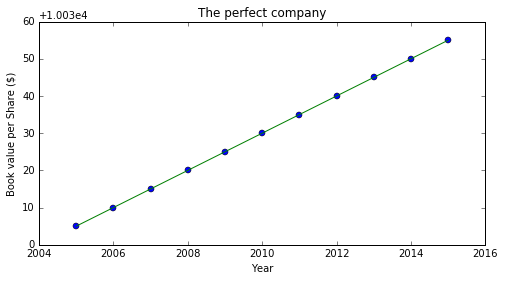

In [16]:
# Here is an example of the perfect linear relationship; we want our company's financials to plot like this..perfect world
# create some fake sample data
x = np.arange(2005,2016,1)
y = 5*x + 10 

# fit with np.polyfit
m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(8,4))
plt.plot(x, y, 'o')
plt.plot(x, m*x + b, '-')
plt.title('The perfect company')
plt.xlabel('Year')
plt.ylabel('Book value per Share ($)')

<br>
Let's examine Pfizer's financials in a table. At the time of this writing (November 2015), the financials for 2015 are not finished (likely only 3 Qtrs in the 2015 numbers).  Things could change at the end of the year.    

In [17]:
# Show a quick table with all the values

df3[['EPS','Dividends','BVPerShare','CurrentRatio','Debt2Equity','ROE']].transpose()

Period,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
EPS,2.94,3.59,4.00,4.70,2.06,4.35,6.63,7.63,9.09,8.63,6.52
Dividends,0.61,0.78,0.91,1.06,1.12,1.16,1.52,1.79,1.99,2.22,2.40
BVPerShare,NaN,16.48,16.28,15.47,17.54,14.48,16.75,17.64,22.98,31.35,23.53
CurrentRatio,2.23,2.09,1.75,1.82,2.42,2.32,2.07,2.24,2.05,2.17,2.05
Debt2Equity,1.71,1.55,1.65,2.13,3.61,2.67,2.49,3.28,2.10,2.69,3.00
ROE,21.85,23.62,24.87,29.99,15.39,33.58,42.78,44.93,41.35,32.72,24.13


Now we invoke [BuffettsBooks.com's](http://buffettsbooks.com/howtoinvestinstocks/course2/stocks/stock-stability.html#sthash.VX0jBPeo.hbdJYZI9.dpbs) interpretation of the first rule. To quote:
>"you want the book value per share (equity) to steadily increase. You want the debt/equity to be below 0.5 and steady or declining, and you want your EPS to be growing or at least consistent. Again, this is no guarantee of the future, but it is a strong indication whether the company at least in the future has proven to have a good track record."

Let's make one thing clear. Past increases are not an indication of a company's future performance.  However, past  consistency is a good indicator of future consistency. Let's look at the data:


R^2 for book value per share = 0.73683483897995339
Slope= 1.267030303030303
p value = 0.01505672232290849

R^2 for debt to equity = 0.59761225569503207
Slope= 0.1230909090909091
p value = 0.052178258957800996

R^2 for Earnings per share is = 0.81401297404187112
Slope= 0.57963636363636373
p value = 0.0022921424801715003


The Average Annual Growth Rate (AAGR) of book-value-per-share  is 5.8318901944128401 percent. The standard deviation is 5.206220638172506

The AAGR of debt-to-equity is 9.8259710264346509 percent.The standard deviation is 0.68312916388151257.

The AAGR of Earnings per share is 16.314593444970047 percent.  The standard deviation is 2.3616777549407155.


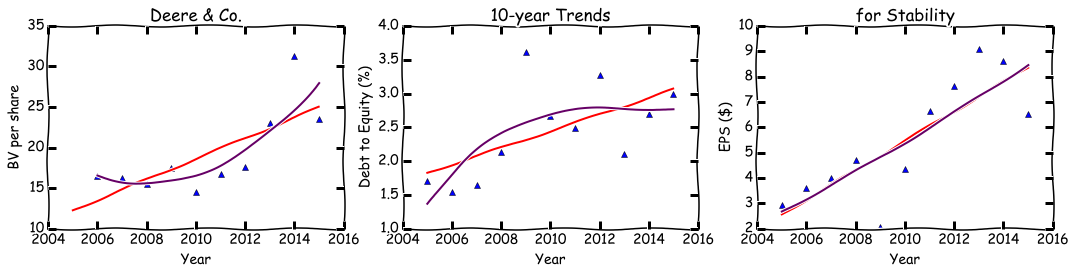

In [18]:
# We plot all the key ratios to test for linear trends to the data; we can do a correlation test for promising data
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

plt.xkcd() # nifty XKCD formatted plots

# Setting up x and y for plots
y1 = df3['BVPerShare']
y2 = df3['Debt2Equity']
y3 = df3['EPS']

# subplots(nrows, ncols, plot_number)

x = df3['Year']


plt.figure(figsize=(18,8))

plt.subplot(2, 3, 1)

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x[1:], y1[1:])

# Calculate some additional outputs
predict_y = intercept + slope * x
pred_error = y1[1:] - predict_y
degrees_of_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)

# Plotting
plt.plot(x[1:], y1[1:], '^')
plt.plot(x, predict_y)
print()
print ("R^2 for book value per share = %r\nSlope= %r\np value = %r" % (r_value, slope, p_value))
x_new = np.linspace(x[1], x[-1], num=len(x)*10)
coefs = poly.polyfit(x[1:], y1[1:], 2)
ffit = poly.Polynomial(coefs)
plt.plot(x_new, ffit(x_new), color='#660066')
plt.title('Deere & Co.')
plt.ylabel('BV per share')
plt.xlabel('Year')

plt.subplot(2, 3, 2)
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y2)

# Calculate some additional outputs
predict_y = intercept + slope * x
pred_error = y2 - predict_y
degrees_of_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)

# Plotting
plt.plot(x, y2, '^')
plt.plot(x, predict_y)
print()
print ("R^2 for debt to equity = %r\nSlope= %r\np value = %r" % (r_value, slope, p_value))
x_new = np.linspace(x[0], x[-1], num=len(x)*10)
coefs = poly.polyfit(x, y2, 3)
ffit = poly.Polynomial(coefs)
plt.plot(x_new, ffit(x_new), color='#660066')
plt.title('10-year Trends')
plt.xlabel('Year')
plt.ylabel('Debt to Equity (%)')

plt.subplot(2, 3, 3)
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y3)

# Calculate some additional outputs
predict_y = intercept + slope * x
pred_error = y3 - predict_y
degrees_of_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)

# Plotting
plt.plot(x, y3, '^')
plt.plot(x, predict_y)
print()
print ("R^2 for Earnings per share is = %r\nSlope= %r\np value = %r" % (r_value, slope, p_value))
x_new = np.linspace(x[0], x[-1], num=len(x)*10)
coefs = poly.polyfit(x, y3, 2)
ffit = poly.Polynomial(coefs)
plt.plot(x_new, ffit(x_new), color='#660066')
plt.title('for Stability')
plt.xlabel('Year')
plt.ylabel('EPS ($)')
print()
print()

# we calculate the AAGR by subtracting a current year's value from the previous year's value and dividing it by the previous year's value.  

print ("The Average Annual Growth Rate (AAGR) of book-value-per-share  is %r percent. The standard deviation is %r" % (((df3['BVPerShare']- df3['BVPerShare'].shift())/df3['BVPerShare'].shift(1)).mean()*100,df3['BVPerShare'].std()),)
print ()
print ("The AAGR of debt-to-equity is %r percent.The standard deviation is %r." % (((df3['Debt2Equity']- df3['Debt2Equity'].shift())/df3['Debt2Equity'].shift(1)).mean()*100,df3['Debt2Equity'].std()),)
print ()
print ("The AAGR of Earnings per share is %r percent.  The standard deviation is %r." % (((df3['EPS']- df3['EPS'].shift())/df3['EPS'].shift(1)).mean()*100,df3['EPS'].std()),)

In [36]:
df3['Debt2Equity'].mean()

2.4436363636363634

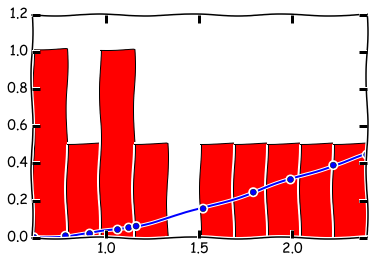

In [44]:
h=df3['Dividends']
fit = stats.norm.pdf(np.log(h), np.mean(h), np.std(h))  #this is a fitting indeed

plt.plot(h,fit,'-o')

plt.hist(h,normed=True)      #use this to draw histogram of your data

plt.show()        

# Everything below here under construction

In [20]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X = df3[['Dividends','EPS']]
y = df3['Year']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

print (est.summary())

                            OLS Regression Results                            
Dep. Variable:                   Year   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     126.6
Date:                Thu, 26 Nov 2015   Prob (F-statistic):           8.80e-07
Time:                        02:31:08   Log-Likelihood:                -9.1000
No. Observations:                  11   AIC:                             24.20
Df Residuals:                       8   BIC:                             25.39
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       2002.4694      0.533   3754.727      0.0

/Users/linwood/anaconda/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


Pfizer's business model did not change between 2008-2009.  "Mr. Market" however, did change and the market crash is what got him into a fit.  For this analysis, it is important to remember that some financials were impacted by events outside of Pfizer's control.  Any endeavor to evaluate the attractiveness of investing in a business must consider all of the information available. We can now conclude that **Pfizer has pretty stable financials**. That is exemplified in the current ratio plot above.  Note the consistent trends in key financials (book value per share, dividends, debt-to-equity, and current ratio) after the 2008-2009 timeframe; after the setback, the same slope and trend continue.  As stated, stable companies tend to remain stable, and unstable companies tend to remain less stable.   

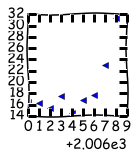

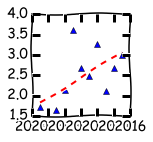

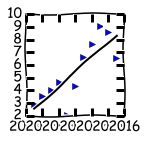

In [21]:

import matplotlib.pyplot as plt

plt.xkcd() # nifty XKCD formatted plots

# Setting up x and y for plots
y1 = df3['BVPerShare']
y2 = df3['Debt2Equity']
y3 = df3['EPS']

# subplots(nrows, ncols, plot_number)

x = df3['Year']



plt.subplot(2,3,1)



slope1, intercept1, r_value1, p_value1, slope_std_error1 = stats.linregress(x, y1)

# Calculate some additional outputs
predict_y1 = intercept1 + slope1 * x
pred_error1 = y1 - predict_y1
degrees_of_freedom = len(x) - 2
residual_std_error1 = np.sqrt(np.sum(pred_error1**2) / degrees_of_freedom)

# Plotting
plt.plot(x, y1, '<')
plt.plot(x, predict_y1, 'r--')
plt.show()


plt.subplot(2,3,2)

slope2, intercept2, r_value2, p_value2, slope_std_error2 = stats.linregress(x, y2)

# Calculate some additional outputs
predict_y2 = intercept2 + slope2 * x
pred_error2 = y2 - predict_y2
degrees_of_freedom = len(x) - 2
residual_std_error2 = np.sqrt(np.sum(pred_error2**2) / degrees_of_freedom)

# Plotting
plt.plot(x, y2, '^')
plt.plot(x, predict_y2, 'r--')
plt.show()


plt.subplot(2,3,3)

slope3, intercept3, r_value3, p_value3, slope_std_error3 = stats.linregress(x, y3)

# Calculate some additional outputs
predict_y3 = intercept3 + slope3 * x
pred_error3 = y3 - predict_y3
degrees_of_freedom = len(x) - 2
residual_std_error3 = np.sqrt(np.sum(pred_error3**2) / degrees_of_freedom)

# Plotting
plt.plot(x, y3, '>')
plt.plot(x, predict_y3, 'k-')
plt.show()

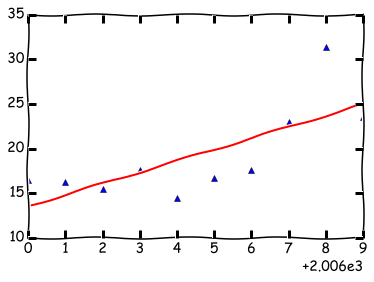

The correlation coefficient for Book value per share data is 0.73683483897995339; the p value is 0.01505672232290849


The pandas Series below provides the year over year percentage change in book value per share.

5.83189019441


In [22]:
# Fit the model

x = df3['Year'][1:]
y = df3['BVPerShare'][1:]

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)

# Calculate some additional outputs
predict_y = intercept + slope * x
pred_error = y - predict_y
degrees_of_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)

# Plotting
plt.plot(x, y, '^')
plt.plot(x, predict_y)

plt.show()


print ('The correlation coefficient for Book value per share data is %r; the p value is %r' % (r_value,p_value))
print ('\n\nThe pandas Series below provides the year over year percentage change in book value per share.\n')
print (((df3['BVPerShare']- df3['BVPerShare'].shift())/df3['BVPerShare'].shift(1)).mean()*100)

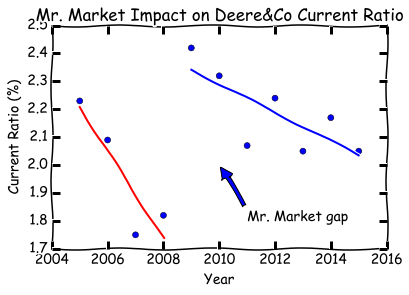


The slope of current ratio data from 2005-2007 is -0.16 and the R sqaured coefficient is -0.89790000000000003

The slope for 2008-2014 data is -0.050000000000000003 and the R squared correlation coefficient is -0.76046599999999998


In [23]:
from scipy import stats

# We are doing a simple linear regression on the current ratio data
# The example comes from http://central.scipy.org/item/16/2/basic-linear-regression

x = df3['Year']
y6 = df3['CurrentRatio']

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x[:4], y6[:4])
slope1, intercept1, r_value1, p_value1, slope_std_error1 = stats.linregress(x[4:], y6[4:])
predict_y = intercept + slope * x
predict_y1 = intercept1 + slope1 * x
pred_error = y6[:4] - predict_y
pred_error1 = y6[4:] - predict_y1
degrees_of_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)
residual_std_error1 = np.sqrt(np.sum(pred_error1**2) / degrees_of_freedom)

# Plotting

plt.plot(x, y6, 'o')
plt.plot(x[:4], predict_y[:4], 'r-')
plt.plot(x[4:], predict_y1[4:], 'b-')
plt.title('Mr. Market Impact on Deere&Co Current Ratio')
plt.ylabel('Current Ratio (%)')
plt.xlabel('Year')
plt.annotate('Mr. Market gap', xy=(2010, 2.0), xytext=(2011, 1.8),arrowprops=dict(facecolor='blue', shrink=0.05),)
#plt.annotate('2005-2007', xy=(2006.3, 2.4), xytext=(2006, 3.0),arrowprops=dict(facecolor='red', shrink=0.05),)
#plt.annotate('2008-2014', xy=(2014.5, 2.8), xytext=(2012.6, 3.4),arrowprops=dict(facecolor='red', shrink=0.05),)
#plt.annotate('Split data at the crash;\nsee two linear trends', xy=(2004.5, 4.5), xytext=(2005, 4.1),arrowprops=dict(facecolor='white', shrink=0.05),)
#plt.annotate('This is 2015', xy=(2014.6, 1.58), xytext=(2010, 1.3),arrowprops=dict(facecolor='black', shrink=0.05),)
plt.show()
print ('\nThe slope of current ratio data from 2005-2007 is %r and the R sqaured coefficient is %r\n\nThe slope for \
2008-2014 data is %r and the R squared correlation coefficient is %r' 
       % (round(slope,2),round(r_value,4),round(slope1,2),round(r_value1,6)))

Real company data rarely lines up in a perfect line (sometimes it does, we're lucky).  But, there is a consistent trend in Pfizer's financials after 2009.  Why the big difference in numbers during this timeframe?  Recall the [stock market crash between 2008-2009](https://en.wikipedia.org/wiki/Stock_market_crash#Crash_of_2008.E2.80.932009).  So, while the linear trend of our data changed (especially in Debt-to-equity, BV per share, and Dividends), the underlying value of the business didn't.  Here, you see how external events can impact the value of businesses. Looking at the financials between 2008-2009, we see the ["Mr. Market" effect](https://en.wikipedia.org/wiki/Mr._Market) on a company's value. In simple terms, Mr. Market explains the impact emotions and short term trends can have on a company's value.  

Let's isolate the "Mr. Market" effect on Pfizer's current ratio which should give us a perfect linear trend.  Pfizer's 10-year current ratio captures its ability to pay bills in a 12 month period; it's only considering short term assets and short term liabilities.  If a company has a current ratio of 1.0 exactly, every dollar it takes in over the next year will go out to pay liabilities (bills) that are due in that 12 months.  Anything over 1.0 means you have a cushion.  Think about it like personal finance month to month.  If you make 2000 USD a month, and have bills that equate to 2000 USD a month, you have a current ratio of 1.0 (not good right?).  If your bills are lower than 2000 USD, then your current ratio is above 1.0. We will break down Pfizer's current ratio to see if that ratio was improving at a steady rate or holding in a general area.  This is an indicator of stability.  Breaking out the data, we get the following: 

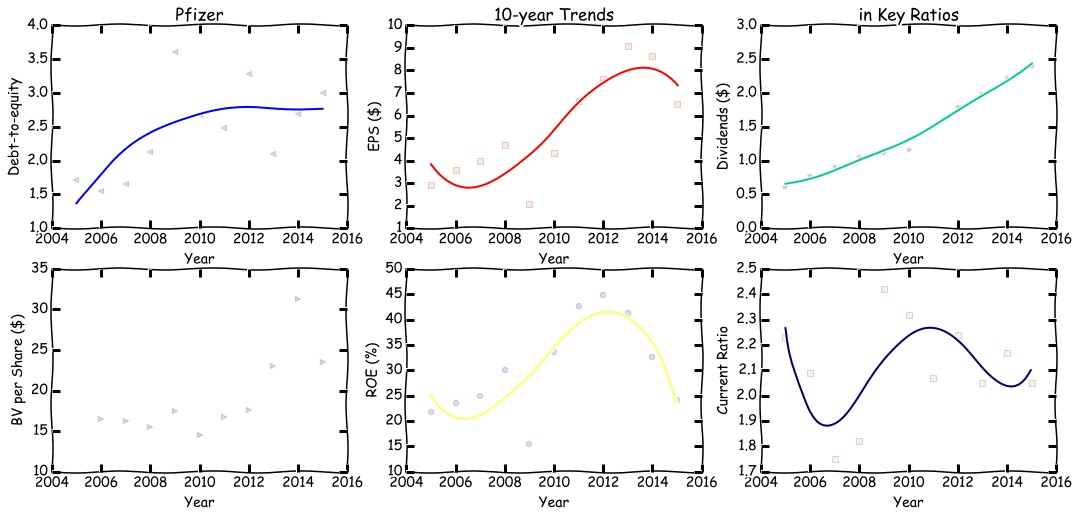

In [24]:
# We plot all the key ratios to test for linear trends to the data; we can do a correlation test for promising data
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

plt.xkcd() # nifty XKCD formatted plots

# Setting up x and y for plots
y1 = df3['Debt2Equity']
y2 = df3['EPS']
y3 = df3['Dividends']
y4 = df3['BVPerShare']
y5 = df3['ROE']
y6 = df3['CurrentRatio']
# subplots(nrows, ncols, plot_number)

x = df3['Year']


plt.figure(figsize=(18,8))

plt.subplot(2, 3, 1)

x_new = np.linspace(x[0], x[-1], num=len(x)*10)
coefs = poly.polyfit(x, y1, 3)
ffit = poly.Polynomial(coefs)
plt.plot(x_new, ffit(x_new))
plt.scatter(x, y1, s=30, alpha=0.15, marker='<', c='#0a13ea')
plt.title('Pfizer')
plt.ylabel('Debt-to-equity')
plt.xlabel('Year')

plt.subplot(2, 3, 2)
x_new = np.linspace(x[0], x[-1], num=len(x)*10)
coefs = poly.polyfit(x, y2, 3)
ffit = poly.Polynomial(coefs)
plt.plot(x_new, ffit(x_new), color='#ff0000')
plt.scatter(x, y2, s=30, alpha=0.15, marker=',', c='#ff6600')
plt.title('10-year Trends')
plt.xlabel('Year')
plt.ylabel('EPS ($)')

plt.subplot(2, 3, 3)
x_new = np.linspace(x[0], x[-1], num=len(x)*10)
coefs = poly.polyfit(x, y3, 3)
ffit = poly.Polynomial(coefs)
plt.plot(x_new, ffit(x_new), color='#00cc99')
plt.scatter(x, y3, s=30, alpha=0.15, marker='*',c='#ff0000')
plt.title('in Key Ratios')
plt.xlabel('Year')
plt.ylabel('Dividends ($)')

plt.subplot(2, 3, 4)
x_new = np.linspace(x[0], x[-1], num=len(x)*10)
coefs = poly.polyfit(x, y4, 1)
ffit = poly.Polynomial(coefs)
plt.plot(x_new, ffit(x_new), color='#660066')
plt.scatter(x, y4, s=30, alpha=0.15, marker='>',c='black')
plt.xlabel('Year')
plt.ylabel('BV per Share ($)')

plt.subplot(2, 3, 5)
x_new = np.linspace(x[0], x[-1], num=len(x)*10)
coefs = poly.polyfit(x, y5, 3)
ffit = poly.Polynomial(coefs)
plt.plot(x_new, ffit(x_new), color='#ffff66')
plt.scatter(x, y5, s=30, alpha=0.15, marker='o',c='blue')
plt.xlabel('Year')
plt.ylabel('ROE (%)')

plt.subplot(2, 3, 6)
x_new = np.linspace(x[0], x[-1], num=len(x)*10)
coefs = poly.polyfit(x, y6, 4)
ffit = poly.Polynomial(coefs)
plt.plot(x_new, ffit(x_new), color='#000066')
plt.scatter(x, y6, s=30, alpha=0.15, marker='s',c='#ff9966')
plt.xlabel('Year')
plt.ylabel('Current Ratio')

plt.show()

After the grunt work, we're finally to the data analysis.  This part is relatively simple.  Here, we are using Buffett's rules and the available data to decide where or not Pfizer is a "value investor" pick for longterm ownership.  This type of analysis is good for individual investors but also for institutional investors who have a longer outlook.  

Of the four rules, two are somewhat subjective.  Its why no two value investor's will have the same portfolio.  We all view companies and profiles differently.  But, to refresh the first two rules for Pfizer:

1. **Is Pfizer a business that I understand?**  <span style="color:red; font-family:Georgia; font-size:initial;">In this example, This rule involves looking at a business your understand and also at the relative stability of the company.  They discover, develop, and manufacture healthcare products. *</span>  
<br>
<br>

2. ** Does Pfizer have favorable longterm prospects?**  *  <span style="color:red; font-family:Georgia; font-size:initial;"> Can we look at the past trajectory of earnings and bookvalue increases, and make a prediction of where the company will be 10 years down the road or more?  We are looking for the simplest model; a linear, positively correlated relationship.  In 2045, people will still need healthcare products.  In fact, we may need them more as medical advances and technology increase the life expectancy. </span>
<br>
<br>

3.  **Is Pfizer operated by honest and competent people?** <span style="color:red; font-family:Georgia; font-size:initial;">We want a debt-to-equity ratio below .50 and a current ratio above 1.50.</span>
<br>
<br>

4. **Is Pfizer available at a very attractive price?** <span style="color:red; font-family:Georgia; font-size:initial;">I will use the [BuffetsBooks.com calculator](http://buffettsbooks.com/howtoinvestinstocks/course2/stocks/intrinsic-value-calculator.html#sthash.I02x9s7w.dpbs).*</span>
<br>
<br>

# Measuring leadership: Debt-to-equity < 0.50 and Current Ratio > 1.50

[In course 2, unit 3 lesson 2 (video #18)](https://www.youtube.com/watch?v=2ngO4jtyGlk&list=PLD3EB06EC4A19BFB8&index=7), Buffettsbooks.com does a great job of explaining how we can measure leadership of a company looking for debt-to-equity ratios below .50  and current ratios greater than 1.50 over a 10 year period.  Our simple task for rule 3 is to see if Pfizer made the cut. But first, let's use a personal example to bring show why measuring these two figures helps identify vigilant leadership.  

## Understanding Debt-to-equity ratio impact to value
Debt represents one of the greatest risks to a company in the same way that debt can damamge personal financial situaitons.  Debt-to-equity can be thought of like this:
>Add up all of your personal debts (credit card, car, loan, etc).  Imagine that came to 20,000 USD.<br>
>Add up all the equity or assets you own (money left in bank account and value of clothes, car and everything you own) minus all the debts and assume that's equal to 100,000 USD <br>
> -->The debt-to-equity ratio is debt (20,000 USD) divided by equity (100,000) USD:


# Rule 3; Measuring a company's leaderhip using financials

[According to BuffetBooks.com (Course 2, unit 3 lesson 2, video #18)](https://www.youtube.com/watch?v=2ngO4jtyGlk&list=PLD3EB06EC4A19BFB8&index=7), competent leaders will manage the amount debt their company takes; the goal is to identify evaluates whether the company's debt-to-equity ratio is below .50  and if the current ratio is greater than 1.50 over a 10 year period.  Managers that carry low levels of debt are conservative with the capital of the business and don't risk your (shareholder) money for a desire to grow too fast. Using the *Good Morning* module, we examine Pfizer's numbers: 

In [25]:
dtoe=20000/100000
print()
print ("The personal debt-to-equity ratio is %r" % dtoe)  # 20,000 in debt divided by 100,000 in equity after paying everything off
print()
print ("In this case, we have 20 cents of debt for every 1 dollar of value")


The personal debt-to-equity ratio is 0.2

In this case, we have 20 cents of debt for every 1 dollar of value


The Buffet rule requires that our companies have ratios below or at 0.50.  Managers that carry low levels of debt are [conservative with the capital of the business and don't risk your (shareholder) money for a desire to grow too fast](http://www.theinvestorspodcast.com/episodes/3-warren-buffett-rules-intrinsic-value.html#sthash.hLue3dzB.dpuf). So we do a simple test to see if individual years were at or below the threshold value and then calculate the average and median of ratio over the previous 10 years. With numbers below the threshold, the company should be able to easily pay of debts in crises situations..

In [26]:
# Let's create a smaller dataframe with only debt-to-equity

df3

,EPS,Dividends,BVPerShare,LTDebt,CurrentRatio,Debt2Equity,ROE,Year
Period,,,,,,,,
2005,2.94,0.61,NaN,34.90,2.23,1.71,21.85,2005
2006,3.59,0.78,16.48,33.36,2.09,1.55,23.62,2006
2007,4.00,0.91,16.28,30.58,1.75,1.65,24.87,2007
2008,4.70,1.06,15.47,35.88,1.82,2.13,29.99,2008
2009,2.06,1.12,17.54,42.28,2.42,3.61,15.39,2009
2010,4.35,1.16,14.48,38.86,2.32,2.67,33.58,2010
2011,6.63,1.52,16.75,35.18,2.07,2.49,42.78,2011
2012,7.63,1.79,17.64,39.91,2.24,3.28,44.93,2012
2013,9.09,1.99,22.98,36.25,2.05,2.10,41.35,2013


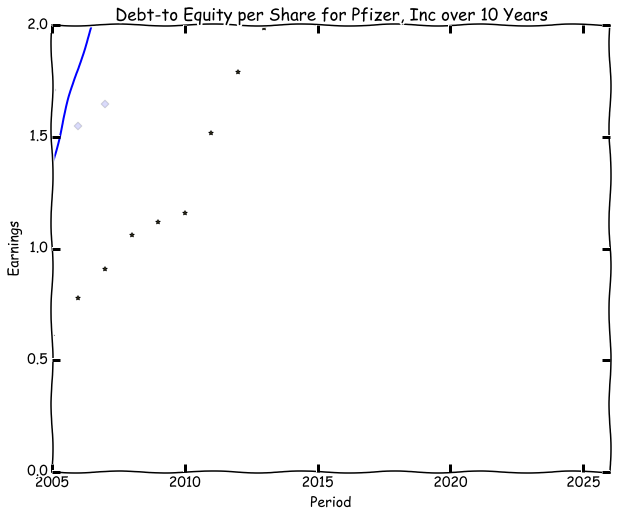

In [27]:

import statsmodels.api as sm
import numpy.polynomial.polynomial as poly

# There's nothing new under the sun; I modified some code for numpy data fitting.  
# The link is http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html



plt.xkcd()
# security data for fitting
x = df3['Year']
y = df3['Debt2Equity']

x_new = np.linspace(x[0], x[-1], num=len(x)*10)
coefs = poly.polyfit(x, y, 3)
ffit = poly.Polynomial(coefs) 
plt.figure(figsize=(10,8))
plt.scatter(x, y, s=30, alpha=0.15, marker='D', c='#0a13ea')
plt.plot(x_new, ffit(x_new))
plt.scatter(df3['Year'],df3['Dividends'], marker ='*', c='#c1b24f')
plt.xlabel('Period')
plt.ylabel('Earnings')
plt.xlim([2005,2026])
plt.ylim([0,2])
plt.title('Debt-to Equity per Share for Pfizer, Inc over 10 Years')
# security data for fitting



In [28]:
df3

,EPS,Dividends,BVPerShare,LTDebt,CurrentRatio,Debt2Equity,ROE,Year
Period,,,,,,,,
2005,2.94,0.61,NaN,34.90,2.23,1.71,21.85,2005
2006,3.59,0.78,16.48,33.36,2.09,1.55,23.62,2006
2007,4.00,0.91,16.28,30.58,1.75,1.65,24.87,2007
2008,4.70,1.06,15.47,35.88,1.82,2.13,29.99,2008
2009,2.06,1.12,17.54,42.28,2.42,3.61,15.39,2009
2010,4.35,1.16,14.48,38.86,2.32,2.67,33.58,2010
2011,6.63,1.52,16.75,35.18,2.07,2.49,42.78,2011
2012,7.63,1.79,17.64,39.91,2.24,3.28,44.93,2012
2013,9.09,1.99,22.98,36.25,2.05,2.10,41.35,2013


In [29]:
df3.columns

Index(['EPS', 'Dividends', 'BVPerShare', 'LTDebt', 'CurrentRatio',
       'Debt2Equity', 'ROE', 'Year'],
      dtype='object')

In [30]:

df3

,EPS,Dividends,BVPerShare,LTDebt,CurrentRatio,Debt2Equity,ROE,Year
Period,,,,,,,,
2005,2.94,0.61,NaN,34.90,2.23,1.71,21.85,2005
2006,3.59,0.78,16.48,33.36,2.09,1.55,23.62,2006
2007,4.00,0.91,16.28,30.58,1.75,1.65,24.87,2007
2008,4.70,1.06,15.47,35.88,1.82,2.13,29.99,2008
2009,2.06,1.12,17.54,42.28,2.42,3.61,15.39,2009
2010,4.35,1.16,14.48,38.86,2.32,2.67,33.58,2010
2011,6.63,1.52,16.75,35.18,2.07,2.49,42.78,2011
2012,7.63,1.79,17.64,39.91,2.24,3.28,44.93,2012
2013,9.09,1.99,22.98,36.25,2.05,2.10,41.35,2013


In [31]:
import statsmodels.api as sm
from patsy import dmatrices
y, X = dmatrices('BVPerShare ~ LTDebt+Year', data=df3, return_type='dataframe')

In [32]:
mod = sm.OLS(y, X)
res=mod.fit()
print (res.summary())
sm.stats.linear_rainbow(res)

                            OLS Regression Results                            
Dep. Variable:             BVPerShare   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     4.320
Date:                Thu, 26 Nov 2015   Prob (F-statistic):             0.0600
Time:                        02:31:11   Log-Likelihood:                -26.141
No. Observations:                  10   AIC:                             58.28
Df Residuals:                       7   BIC:                             59.19
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -2754.3113   1052.484     -2.617      0.0

/Users/linwood/anaconda/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


(2.0080434205987197, 0.36500257437763428)

In [33]:
sm.graphics.plot_partregress('')

TypeError: plot_partregress() missing 2 required positional arguments: 'exog_i' and 'exog_others'

In [ ]:
'''
from bokeh.plotting import figure, show, output_notebook
import numpy.polynomial.polynomial as poly

x = df3.index
y = df3['Debt/Equity']
output_notebook()
p1 = figure(x_axis_type='datetime',plot_width=800, plot_height=600)
p1.scatter(x,y, color="#FF00FF", nonselection_fill_color="#FFFF00", nonselection_fill_alpha=1)
show(p1);
'''

In [ ]:
df3['index']=df3.index.to_period()

In [ ]:
df3

In [ ]:
# We create a conditional to look at the 75% quantile and average debt-to-equity over 10 years

print (df3['Debt/Equity']<.50)
print () #whitespace
print ()

vigilant1 = df3['Debt/Equity'].mean()
vigilant1med=df3['Debt/Equity'].quantile(0.75)
if vigilant1 < .50 and vigilant1med < .50 :
    print ("The 10-year average and median debt-to-equity ratios for this company are %r and %r respectively (both less than 0.50).  Therefore, the company PASSES Buffett's 3rd rule for vigilant leadership." % (round(vigilant1,2),vigilant1med))
    
else:
    print ("The 10-year average and median debt-to-equity ratios for this company are %r and %r respectively (one or both under 0.50).  Therefore, the company FAILS Buffett's 3rd rule for vigilant leadership." % (round(vigilant1,2),vigilant1med))


## A quick lesson on the current ratio
Next, we will look at the current ratio.  This number gives an idea of how the company will handle debt in the next year (12 months).  Just like personal finance, a company will take on debt if it takes in less money over the next 12 months than it pays out.  Any assets that will likely convert to cash over the next 12 months is [Total current assets](http://www.investopedia.com/terms/c/currentassets.asp); this flows INTO the company.  The number of "bills' due within 12 months are the [Total current Liabilities](http://www.investopedia.com/terms/c/currentliabilities.asp); this flows OUT OF the company. You just divide the money going in by the money going out.  Current ratios are above 1.50 are ideal, and current ratios right at the 1.0 mark bring cause for concern.  Figures lower than 1 point to a situation where a company will likely take on debt to finance current operations.  

In [ ]:
print() # whitespace

# Boolean index of the dataframe; if the value is less than .50, returns "True"
print (df3['Debt/Equity']<.50)

print() # whitespace
print()


# Average of the column; we want a value less than .50
print ("The average debt-to-equity ratio for Pfizer over a 10-year period is %r." % round(df3['Debt/Equity'].mean(),2) )
vigilant1= round(df3['Debt/Equity'].mean(),2)

This is the same concept as the personal debt-to-equity ratio used in personal finance.  Basically, this is a calculation of the total assets you own and the total liabilities (debts) you owe.  High debt is one danger to a company, and good managers manage the amount of debt their companies take on.  

We can illustrate this "danger" by equating it to personal finance.  If you added up everything you owned (stocks, bank accounts, etc.) that would be your assets.  Let's say that was 100,000.  Now, if you added up everything you OWED (mortgage, car, bills, etc.), that would equal your total liabilities.  Let's say that is 90,000. If you died, your family would be left with $ 10,000 after everything was paid off (not including taxes).  In this case, you equity is $10,000 and your debt-to-equity ratio is 0.90.

Buffett historically buys companies with a ratio lower than .50.  A debt-to-equity ratio of .50 means that a company has 50 cents of debt for every dollar of equity.  

In [48]:
df3['CurrentRatio']>1.50

Period
2005    True
2006    True
2007    True
2008    True
2009    True
2010    True
2011    True
2012    True
2013    True
2014    True
2015    True
Freq: A-OCT, Name: CurrentRatio, dtype: bool

In [46]:

df3['BVdiff']= df3['BVPerShare'][1:]-df3['BVperShare'][1:].shift()
#df3['Unaccounted_Earnings']=df3.apply(lambda row: row['EPS']-(row['dividend'] + row['BVdiff']),axis=1)

KeyError: 'BVperShare'

In [ ]:
df3;

In [ ]:
import good_morning as gm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

When we make a prediction of future earnings on a linear model, we can make some assumptions of the future based on the past.  Here, I calculate the the ratio of earnings to book value.  The goal is to see how earnings historically related to book value every year to calculate the next years earnings.  This is why stability is so important; if the financials over a 10 year period form a positively correlated linear model, predictions become easier.  The goal is to find those companies with positively correlated earnings, debt-to-equity ratio, dividend, book-value-per-share, and current ratio. So we get the percentage for each year and then calculate basic summary statistics.  

In [ ]:
df.apply(lambda row: row['EPS']/row['BVperShare'], axis=1).describe()


In [ ]:
df

In [ ]:
df[['EPS','BVperShare','dividend','BVdiff']];

In [ ]:
company = df[['EPS']].sum()
pocket=df[['dividend']].sum()+df.BVperShare.iloc[-1]-df.BVperShare.iloc[0]

In [ ]:
company.iloc[0]-pocket.iloc[0]

In [ ]:
import numpy.polynomial.polynomial as poly

# There's nothing new under the sun; I modified some code for numpy data fitting.  
# The link is http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html


# security data for fitting
x = df.index
y = df['BVperShare']

x_new = np.linspace(x[0], x[-1], num=len(x)*10)
coefs = poly.polyfit(x, y, 1)
ffit = poly.Polynomial(coefs) 
plt.scatter(x, y, s=30, alpha=0.15, marker='D')
plt.plot(x_new, ffit(x_new))
plt.xlabel('Period')
plt.ylabel('Earnings')
plt.xlim([2005,2026])
plt.ylim([7,16])
plt.title('Book Value per Share for Pfizer, Inc over 10 Years')

In [ ]:
(intday.index+1)

In [ ]:
df3=df3.rename(columns={'index':'Year'})
df3

In [ ]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Pulling the data out for the simple linear model
X = np.asarray(df[['index']])
y = np.asarray(df['BVperShare'])


# Train the model using the training sets
regr.fit(X, y)


In [ ]:
regr.predict(2016)

Use the predicted book value per share to get an estimated earnings per share.  I use the predicted book value for the next year (above) and the average earnings-to-book value ratio for ten years.  

In [ ]:
regr.predict(2016)*df.apply(lambda row: row['EPS']/row['BVperShare'], axis=1).mean()

Finally, we have enough data to make the ultimate calculation; the intricsic value.  To do this, we take all the values from the historical financials and plug them into [Buffett Books Intrinsic Value Calculator](http://buffettsbooks.com/howtoinvestinstocks/course2/stocks/intrinsic-value-calculator.html#sthash.I02x9s7w.dpbs).  For every investor, intrinsic values will differ given the use of the current US treasury 10 year yield.  That changes daily; so calculating intrinsic value today or next week will change.  Either way, you set a bar for each stock that you look at, so know when something is 'on sale'.  